In [227]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats, special
from scipy.signal import fftconvolve

plt.rcParams['figure.figsize'] = (10,8)

# Problem 1

## A)

In [392]:
################ This is probably the right way to do it
mu = np.random.random()*9.5 + 0.5
Y = np.random.random()*(10-mu) + mu
bg = stats.poisson(mu)
x = np.arange(bg.ppf(0.0001),bg.ppf(0.9999))

In [229]:
def sum_bg(num_days,dist=bg.pmf(x)):
    if num_days > 1:
        return sum_bg(num_days - 1, fftconvolve(bg.pmf(x),dist))
    return dist

def sum_bg_mean(num_days):
    mean = 0
    dist = sum_bg(num_days)
    axis = np.arange(x[0],len(dist))
    for i in range(len(dist)):
        mean += axis[i]*dist[i]
    return mean

def sum_bg_var(num_days):
    w = sum_bg(num_days)
    var = 0
    for i in range(len(w)):
        var += w[i]*np.power((np.arange(x[0],len(w))[i] - sum_bg_mean(num_days)),2)
    return var

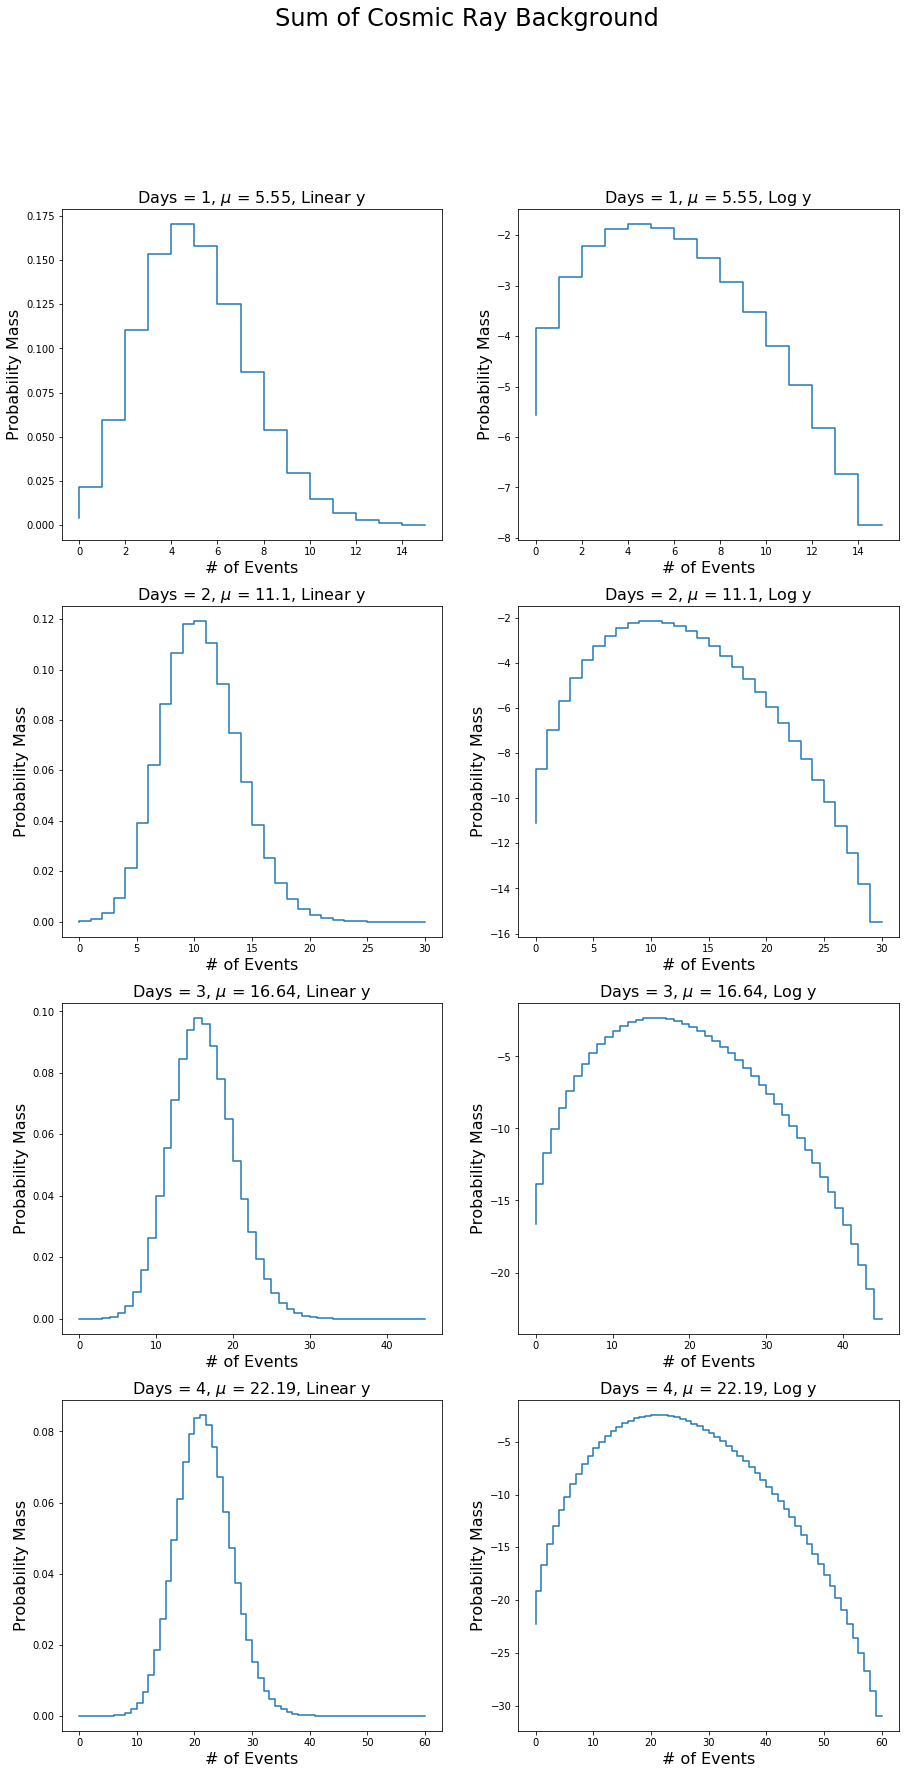

In [230]:
fig,ax = plt.subplots(4,2, figsize=(15,28))
fig.suptitle(f'Sum of Cosmic Ray Background',fontsize=24)
days=1    
for i in range(4):
        dist = sum_bg(days)
        ax[i,0].step(np.arange(x[0],len(dist)),dist)
        ax[i,0].set_xlabel("# of Events",fontsize=16)
        ax[i,0].set_ylabel("Probability Mass",fontsize=16)
        ax[i,0].set_title(f'Days = {days}, $\mu$ = {np.round(sum_bg_mean(days),decimals=2)}, Linear y',fontsize=16)
        ax[i,1].step(np.arange(x[0],len(dist)),np.log(dist))
        ax[i,1].set_xlabel("# of Events",fontsize=16)
        ax[i,1].set_ylabel("Probability Mass",fontsize=16)
        ax[i,1].set_title(f'Days = {days}, $\mu$ = {np.round(sum_bg_mean(days),decimals=2)}, Log y',fontsize=16)
        days+=1
plt.show()

# B)

We can see below that the probability distribution for the sum of the background after 5 days has approximately the same $\mu$ and $\sigma$ (the error is due to the computational method). Thus, by definition, the 5-day background distribution is a Poisson distribution.

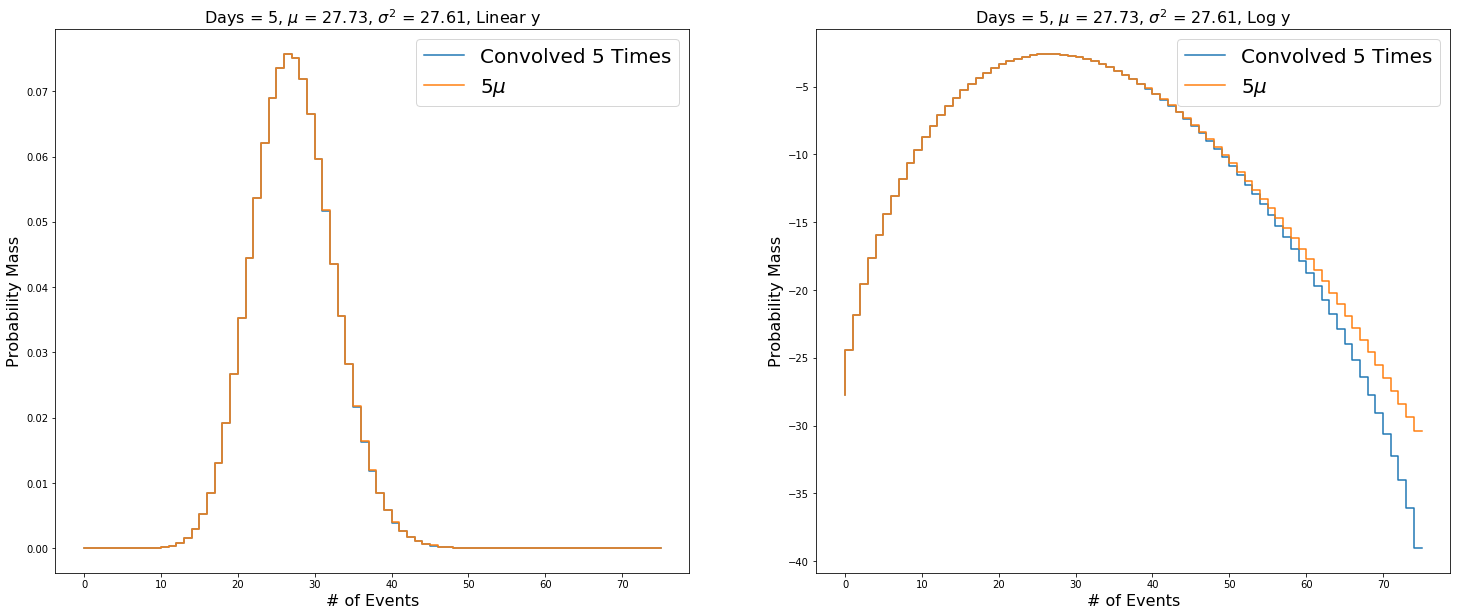

In [231]:
dist = sum_bg(5)

fig,ax = plt.subplots(1,2,figsize=(25,10))
ex=np.arange(x[0],len(dist))
ax[0].step(ex,dist,label="Convolved 5 Times")
ax[0].step(ex,stats.poisson.pmf(ex,5*mu),label='5$\mu$')
ax[0].set_xlabel("# of Events",fontsize=16)
ax[0].set_ylabel("Probability Mass",fontsize=16)
ax[0].set_title(f'Days = {5}, $\mu$ = {np.round(sum_bg_mean(5),decimals=2)}, $\sigma^2$ = {np.round(sum_bg_var(5),decimals=2)}, Linear y',fontsize=16)
ax[0].legend(fontsize=20)

ax[1].step(ex,np.log(dist),label="Convolved 5 Times")
ax[1].step(ex,np.log(stats.poisson.pmf(ex,5*mu)),label='5$\mu$')
ax[1].set_xlabel("# of Events",fontsize=16)
ax[1].set_ylabel("Probability Mass",fontsize=16)
ax[1].set_title(f'Days = {5}, $\mu$ = {np.round(sum_bg_mean(5),decimals=2)}, $\sigma^2$ = {np.round(sum_bg_var(5),decimals=2)}, Log y',fontsize=16)
ax[1].legend(fontsize=20)
plt.show()

[INSERT MATHEMATICAL AND CONCEPTUAL EXPLANATION HERE]

## C)

In [232]:
def plot_bg_avg(day_start,day_end):
    fig,ax = plt.subplots(1,2, figsize=(25,10))   
    for i in range(day_start,day_end + 1):
            days=i
            dist = sum_bg(days)
            ax[0].step(np.arange(x[0],len(dist))/days,dist,label=f'Days = {days}')
            ax[0].set_xlabel("# of Events",fontsize=16)
            ax[0].set_ylabel("Probability Mass",fontsize=16)
            ax[0].set_title(f'Linear y, $\mu$ = {np.round(sum_bg_mean(days)/days,decimals=2)}',fontsize=20)
            ax[1].step(np.arange(x[0],len(dist))/days,np.log(dist),label=f'Days = {days}')
            ax[1].set_xlabel("# of Events",fontsize=16)
            ax[1].set_ylabel("Probability Mass",fontsize=16)
            ax[1].set_title(f'Log y, $\mu$ = {np.round(sum_bg_mean(days)/days,decimals=2)}',fontsize=20)
    fig.suptitle(f'Average of Cosmic Ray Background\nDays {day_start} - {day_end}',fontsize=24)
    ax[0].legend(fontsize=20)
    ax[1].legend(fontsize=20)
    plt.show()

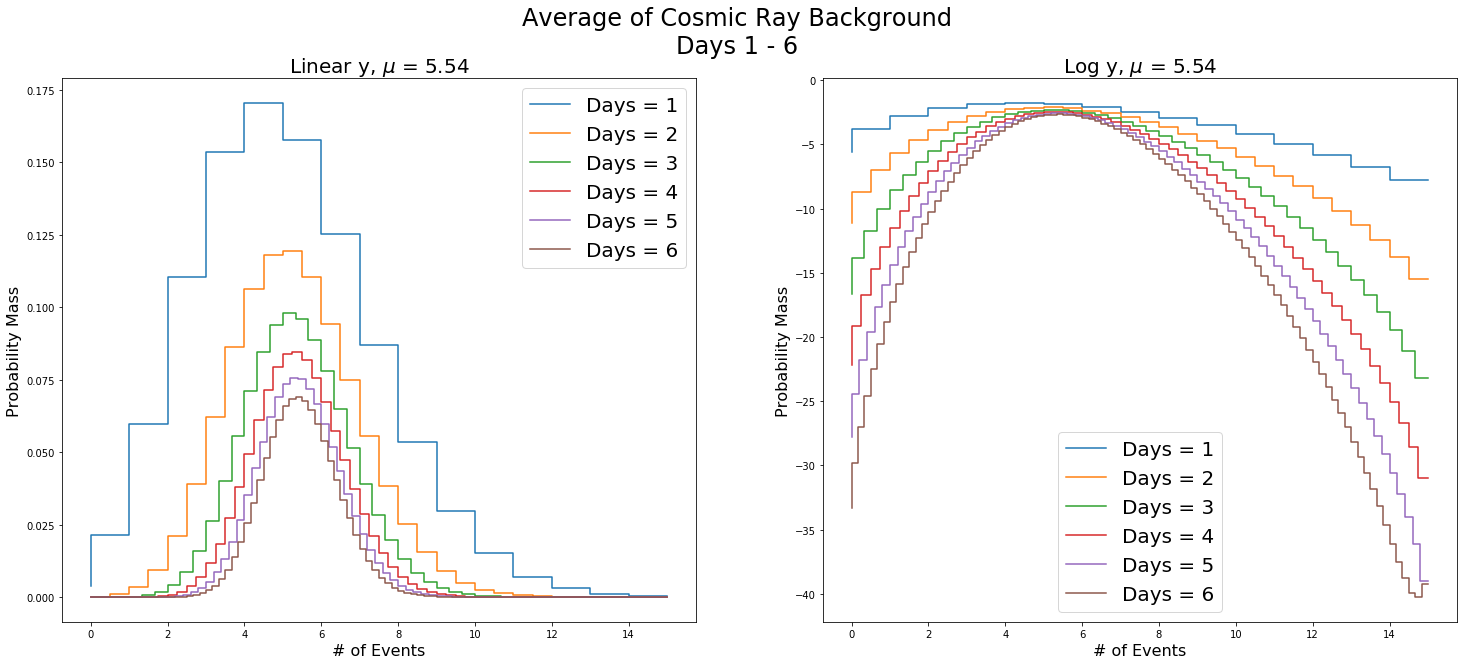

/home/anthony/anaconda3/envs/phys_434/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/anthony/anaconda3/envs/phys_434/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


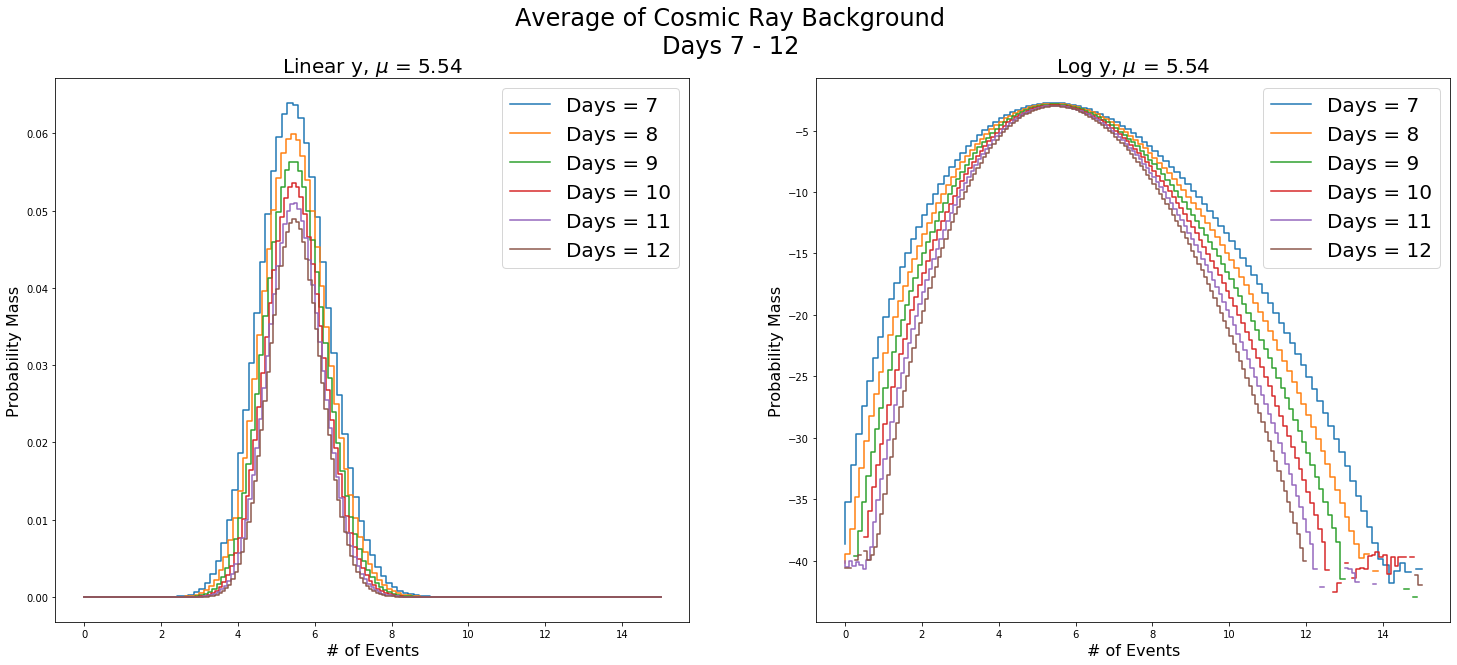

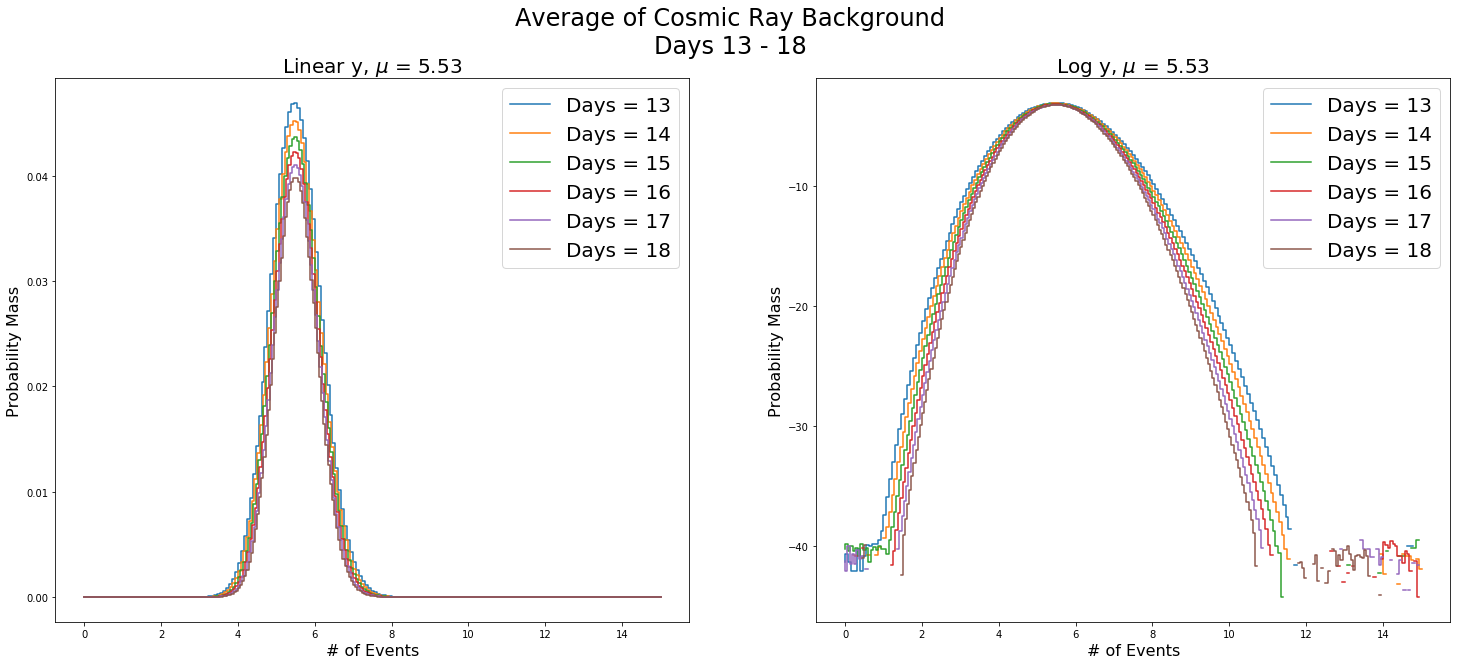

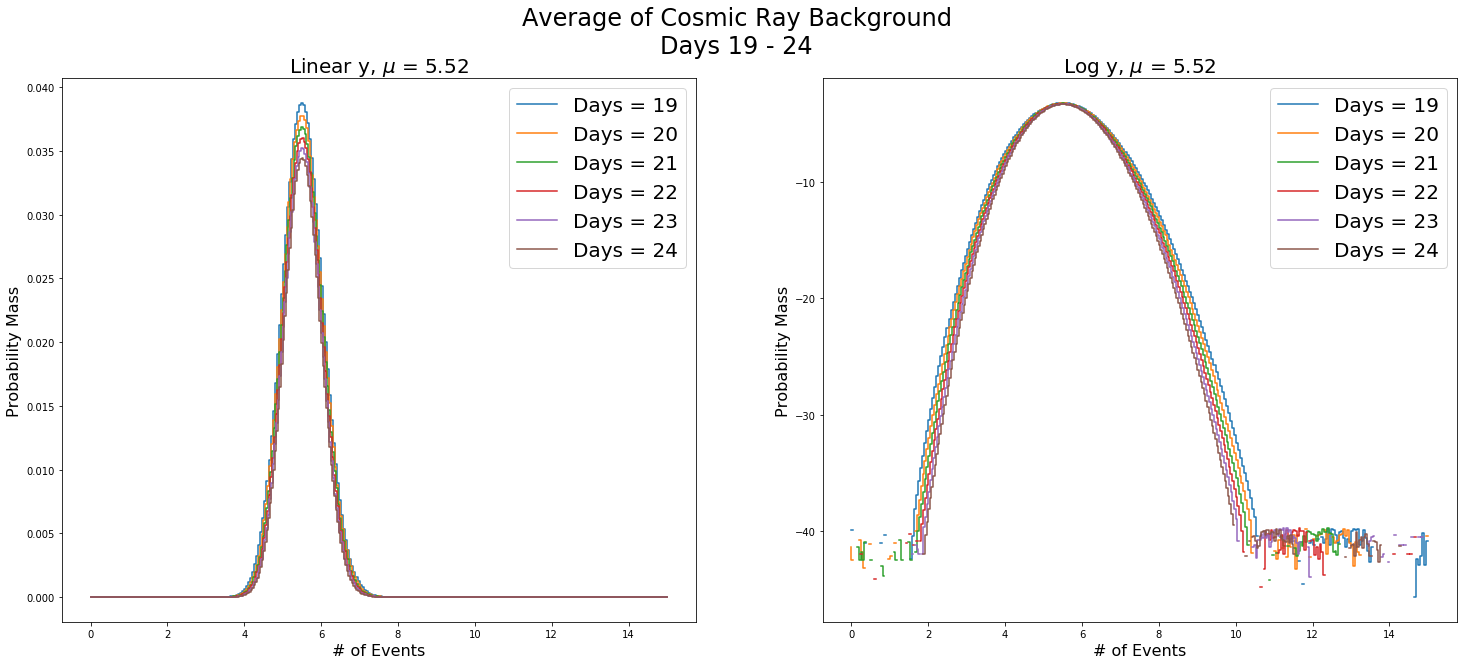

In [233]:
plot_bg_avg(1,6)
plot_bg_avg(7,12)
plot_bg_avg(13,18)
plot_bg_avg(19,24)

## D)

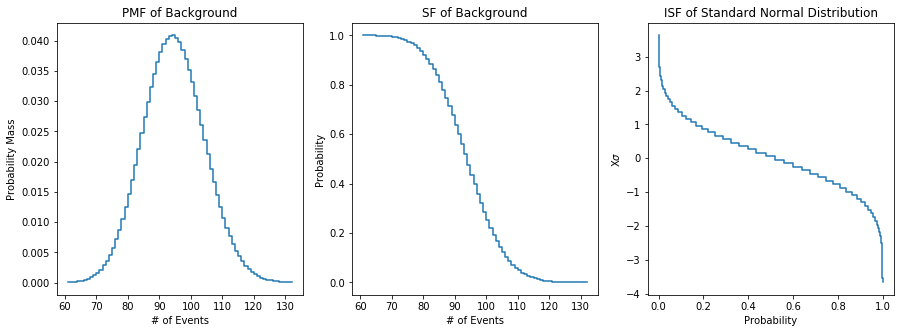

In [393]:
N = np.random.randint(1,5*int(Y))

num_events = int(N*Y)
dist = stats.poisson(N*mu)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ex=np.arange(dist.ppf(0.0001),dist.ppf(0.9999))
ax[0].step(ex,dist.pmf(ex))
ax[0].set_xlabel('# of Events')
ax[0].set_ylabel('Probability Mass')
ax[0].set_title('PMF of Background')

ax[1].step(ex,dist.sf(ex))
ax[1].set_xlabel('# of Events')
ax[1].set_ylabel('Probability')
ax[1].set_title('SF of Background')

ax[2].step(dist.sf(ex),stats.norm.isf(dist.sf(ex)))
ax[2].set_xlabel('Probability')
ax[2].set_ylabel('X$\sigma$')
ax[2].set_title('ISF of Standard Normal Distribution')

plt.show()

In [394]:
#Note: I'm almost sure I did the 'sigma' wrong
probability = dist.sf(num_events)
sigma = stats.norm.isf(probability)
print(f'The probability of observing {num_events} gamma rays over {N} days is {np.round(probability,decimals=5)}. The \'sigma\' of the probability is {np.round(sigma,decimals=5)}.')

The probability of observing 97 gamma rays over 10 days is 0.39702. The 'sigma' of the probability is 0.26107.


# Problem 2

## A)

In [587]:
def plot_avg_chi2(num_times,k):
    dist = stats.chi2(num_times*k)
    x = np.linspace(dist.ppf(0.0000001),dist.ppf(0.9999999),1000)
    fig, ax = plt.subplots(1,2)
    ax[0].plot(x,dist.pdf(x))
    ax[1].plot(x,dist.logpdf(x))
    plt.show()

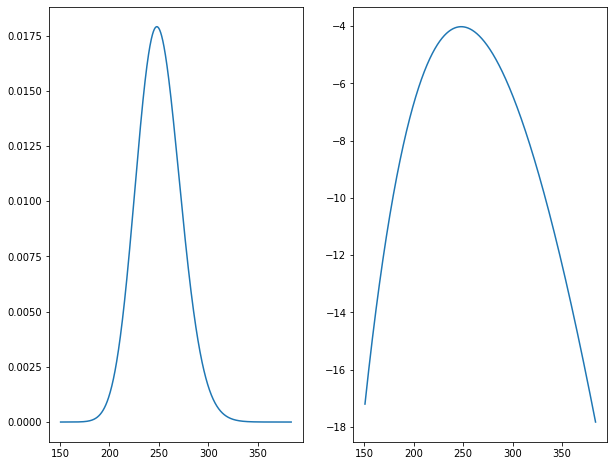

In [588]:
plot_avg_chi2(50,5)

## B)

# Problem 3

## A)

In [600]:
dev = np.random.random()*2.0
mu = np.random.random()*5.0 + dev*3
bg = stats.norm(loc=mu,scale=dev)
x = np.linspace(bg.ppf(0.0001),bg.ppf(0.9999),10000)
Y = np.random.choice(x) + mu

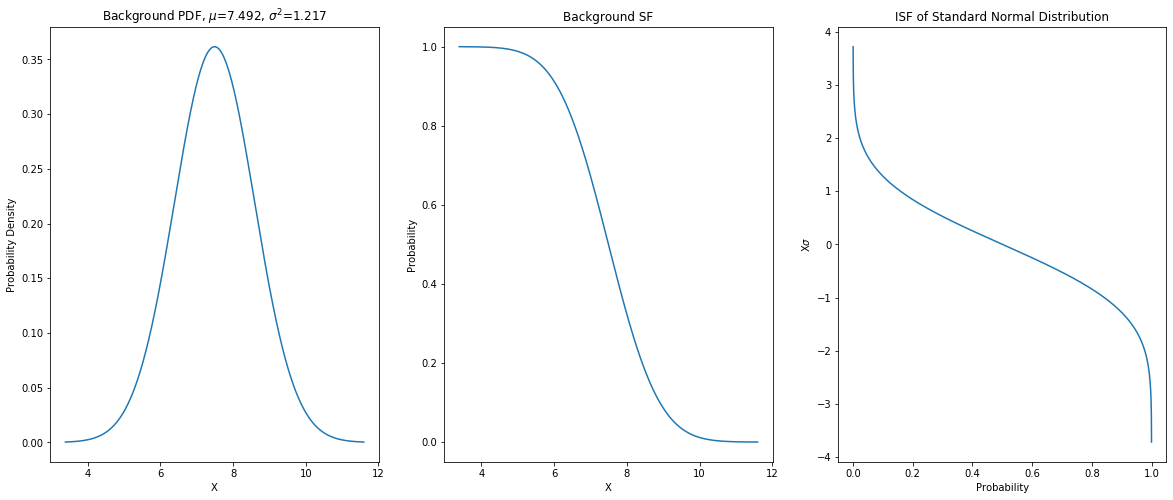

In [601]:
def plot_bg(dist):
    fig,ax = plt.subplots(1,3, figsize=(20,8))

    ax[0].plot(x,dist.pdf(x))
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Probability Density')
    ax[0].set_title(f'Background PDF, $\mu$={np.round(mu,decimals=3)}, $\sigma^2$={np.round(np.power(dev,2),decimals=3)}')

    ax[1].plot(x,bg.sf(x))
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Probability')
    ax[1].set_title(f'Background SF')

    ax[2].plot(dist.sf(x),stats.norm.isf(dist.sf(x)))
    ax[2].set_xlabel('Probability')
    ax[2].set_ylabel('X$\sigma$')
    ax[2].set_title(f'ISF of Standard Normal Distribution')

    plt.show()

plot_bg(bg)

In [602]:
sigma = stats.norm.isf(bg.sf(Y))
print(f'The significance of detecting a signal of strength {np.round(Y,decimals=3)} is {np.round(sigma,decimals=3)}.')
if sigma > 5:
    print('Since this is greater than 5, we can claim discovery.')
else:
    print('Since this is not greater than 5, we can\'t claim discovery.')

The significance of detecting a signal of strength 15.56 is 7.313.
Since this is greater than 5, we can claim discovery.


## B)

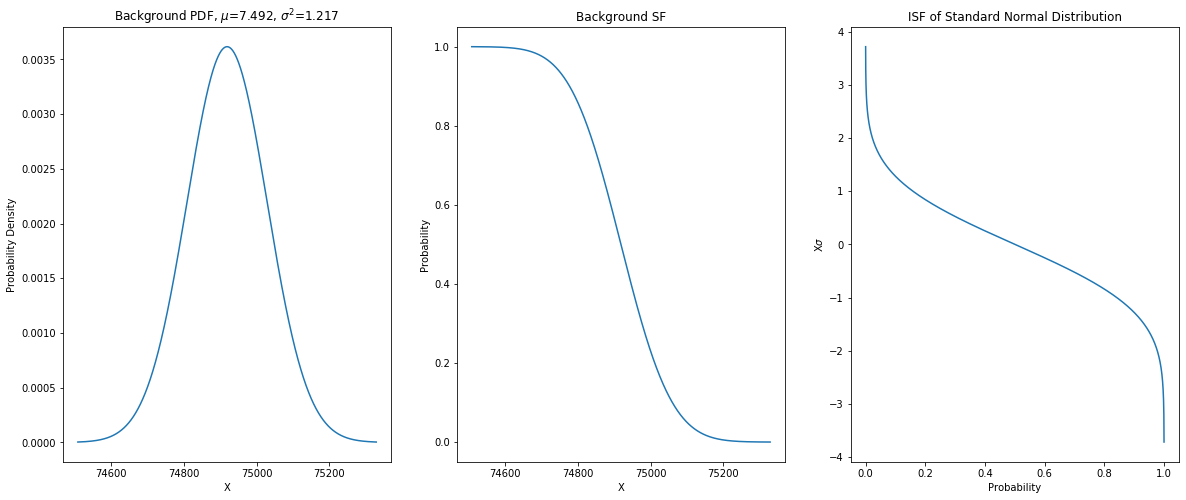

In [603]:
bg = stats.norm(loc=10000*mu,scale=100*dev)
x = np.linspace(bg.ppf(0.0001),bg.ppf(0.9999),10000)
plot_bg(bg)

100.0

# Problem 4